In [336]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pyexcel_xlsx
%pylab inline
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors', 'boxplot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [337]:
pylab.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25, 'lines.markersize' : 15, 'xtick.labelsize': 20, 'ytick.labelsize': 20 })#,'font.family': 'serif'})
rc('axes', linewidth=3)
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator


# Evaluate Raw Data

In [338]:
data = pd.read_excel(r'/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/PYTHON/DamageData.xlsx')
df = pd.DataFrame(data)
df = df.set_index(['FIPS'])
df.describe()

Count_       Sum_NA     Sum_AFF     Sum_DES
count   905.000000   905.000000  905.000000  905.000000
mean   1666.792265  1609.773481   53.327072    3.691713
std     957.592920   922.983960   67.493192    9.579834
min       0.000000     0.000000    0.000000    0.000000
25%     971.000000   937.000000    7.000000    0.000000
50%    1510.000000  1435.000000   27.000000    0.000000
75%    2285.000000  2188.000000   74.000000    3.000000
max    7069.000000  7058.000000  425.000000  145.000000

In [339]:
df_hist1 = pd.DataFrame(df['Count_'])
df_hist2 = pd.DataFrame(df[['Sum_NA', 'Sum_AFF', 'Sum_DES']])

In [340]:
# df_hist2.plot.hist(subplots = True, legend = True, layout =(1,3), ec='white', grid = True)

Text(0.5,0.04,'Sum per Census Tract')

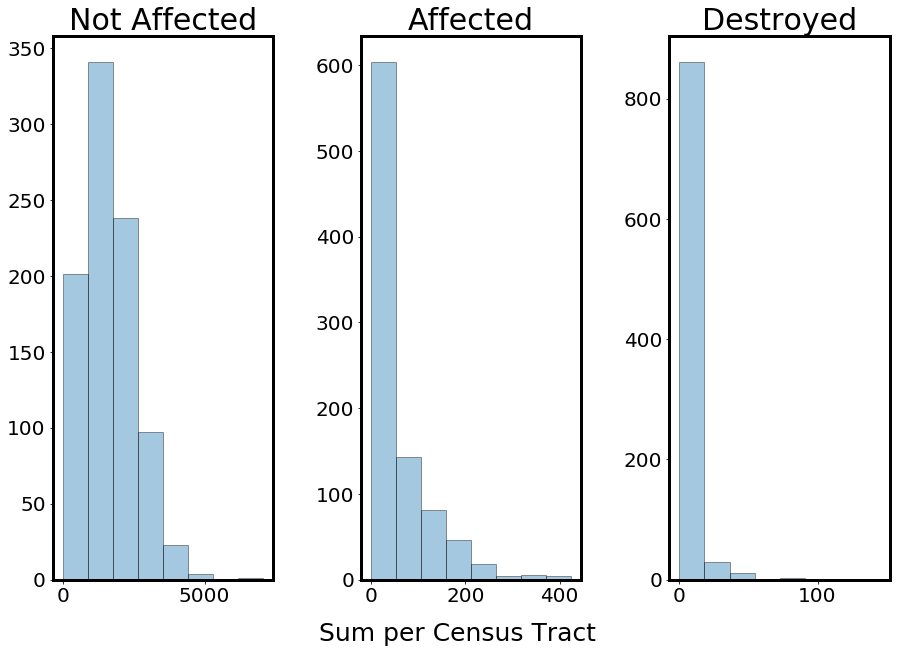

In [341]:
plt.rcParams["patch.force_edgecolor"] = True
fig, ax = plt.subplots(1,3,figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.distplot(df_hist2['Sum_NA'].values,bins=8,kde=False,ax=ax[0])
sns.distplot(df_hist2['Sum_AFF'].values,bins=8,kde=False,ax=ax[1])
sns.distplot(df_hist2['Sum_DES'].values,bins=8,kde=False,ax=ax[2])
ax[0].set_title('Not Affected')
ax[1].set_title('Affected')
ax[2].set_title('Destroyed')
fig.text(0.5, 0.04, 'Sum per Census Tract', ha='center')


# Create Damage Indices

O_Ind = Original Index (AFF + (DES*2) / Total)   
R_Ind = Ratio Index ((AFF + DES) / Total)  
RA_Ind = Raio Affected Index  (AFF/Total)  
RD_Ind = Ration Destroyed Index (DES / Total  
WD_Ind = weighted destroyed index (Aff + (DES * 10) / Total)

In [342]:
df['O_Ind'] = (df.Sum_AFF + (df.Sum_DES * 2))/(df.Count_)
df['R_Ind'] = (df.Sum_AFF + (df.Sum_DES))/(df.Count_)
df['RA_Ind'] = (df.Sum_AFF)/(df.Count_)
df['RD_Ind'] = (df.Sum_DES)/(df.Count_)
df['WD_Ind'] = (df.Sum_AFF + (df.Sum_DES * 10))/(df.Count_)

In [343]:
df.fillna(0, inplace=True)

In [344]:
df.describe()

Count_       Sum_NA     Sum_AFF     Sum_DES       O_Ind  \
count   905.000000   905.000000  905.000000  905.000000  905.000000   
mean   1666.792265  1609.773481   53.327072    3.691713    0.035629   
std     957.592920   922.983960   67.493192    9.579834    0.046323   
min       0.000000     0.000000    0.000000    0.000000    0.000000   
25%     971.000000   937.000000    7.000000    0.000000    0.006818   
50%    1510.000000  1435.000000   27.000000    0.000000    0.022890   
75%    2285.000000  2188.000000   74.000000    3.000000    0.048136   
max    7069.000000  7058.000000  425.000000  145.000000    0.560000   

            R_Ind      RA_Ind      RD_Ind      WD_Ind  
count  905.000000  905.000000  905.000000  905.000000  
mean     0.033240    0.030850    0.002389    0.054745  
std      0.040553    0.036452    0.009631    0.113289  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.006731    0.006112    0.000000    0.008048  
50%      0.022033    0.021277    0.000000    0.027827  
75%      0.045425    0.042514    0.001954    0.065990  
max      0.480000    0.400000    0.200000    2.100000

Text(0.5,1,'Damage Index \n')

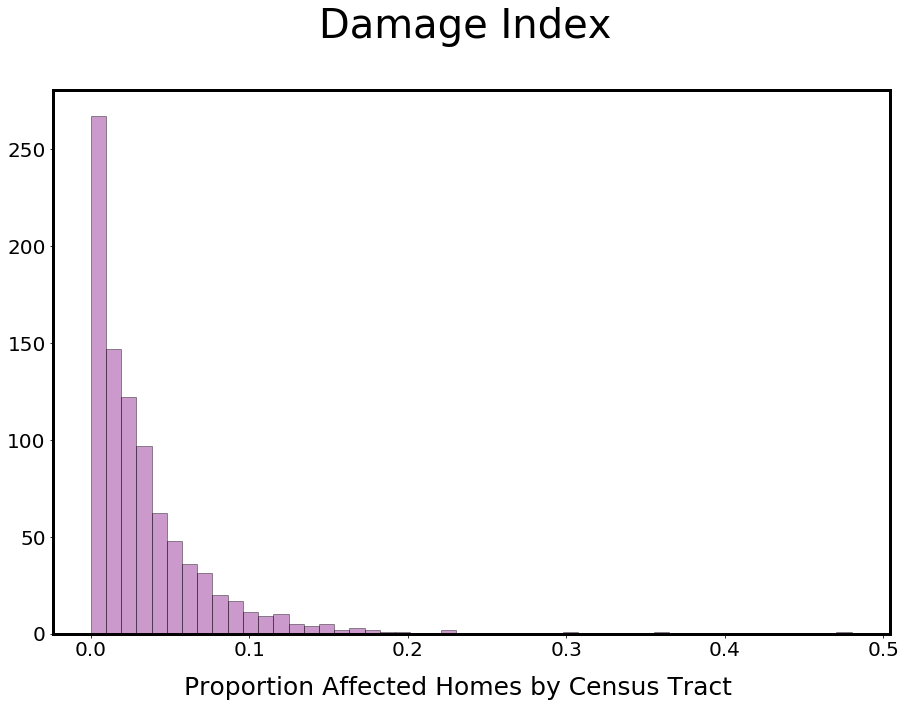

In [345]:
import matplotlib.colors as colors
fig, ax = plt.subplots(1,1,figsize=(15, 10))
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(df['R_Ind'].values,kde=False,color='purple')
fig.text(0.5, 0.04, 'Proportion Affected Homes by Census Tract', ha='center')
ax.set_title('Damage Index \n', fontsize = 40)

Text(0.5,0.04,'Sum per Census Tract')

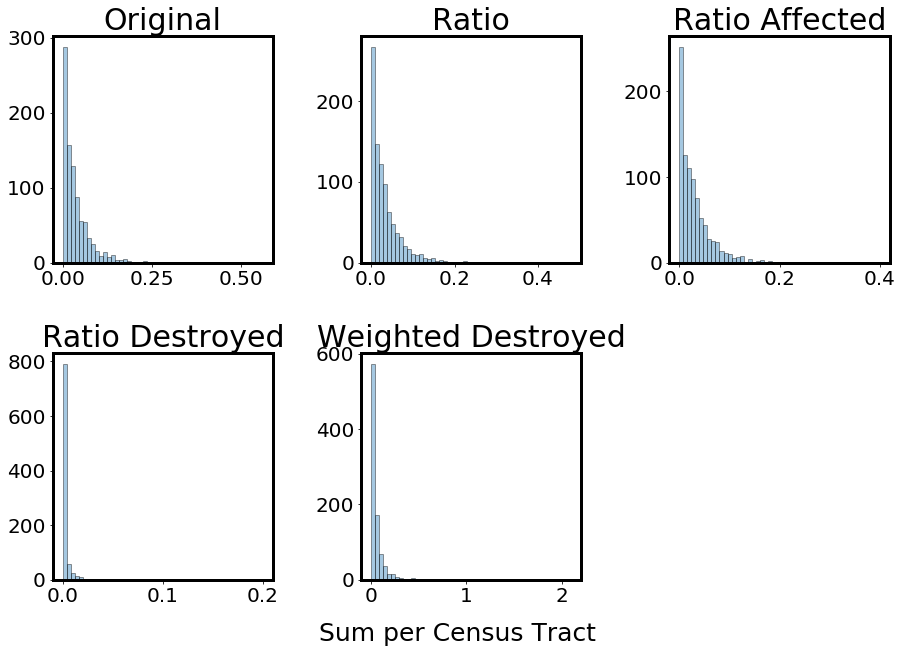

In [346]:
plt.rcParams["patch.force_edgecolor"] = True
fig, ax = plt.subplots(2,3,figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

sns.distplot(df['O_Ind'].values,kde=False,ax=ax[0,0])
sns.distplot(df['R_Ind'].values,kde=False,ax=ax[0,1])
sns.distplot(df['RA_Ind'].values,kde=False,ax=ax[0,2])
sns.distplot(df['RD_Ind'].values,kde=False,ax=ax[1,0])
sns.distplot(df['WD_Ind'].values,kde=False,ax=ax[1,1])
fig.delaxes(ax[1,2])

ax[0,0].set_title('Original')
ax[0,1].set_title('Ratio')
ax[0,2].set_title('Ratio Affected')
ax[1,0].set_title('Ratio Destroyed')
ax[1,1].set_title('Weighted Destroyed')


fig.text(0.5, 0.04, 'Sum per Census Tract', ha='center')

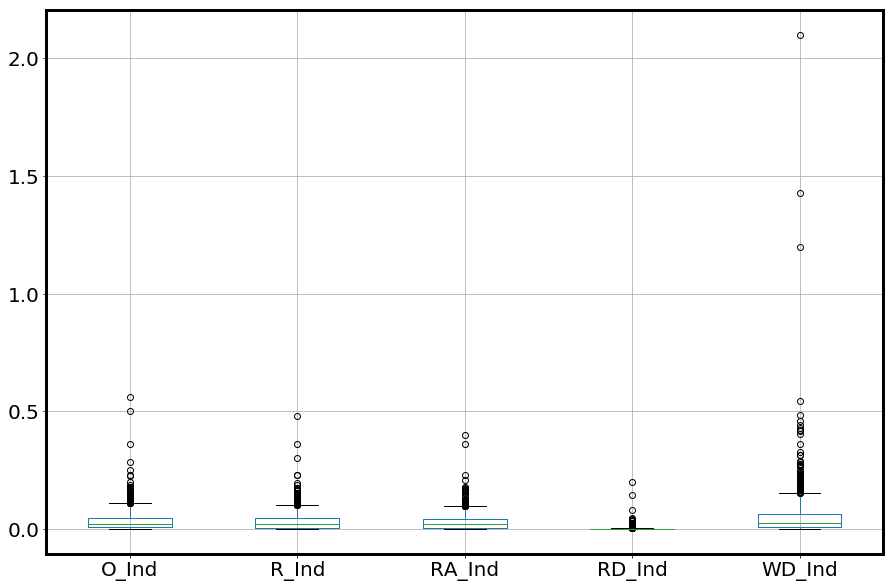

In [347]:
boxplot = df.boxplot(column=['O_Ind', 'R_Ind', 'RA_Ind', 'RD_Ind','WD_Ind'])


In [348]:
df.to_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/DamageIndices1.xlsx")

# Drop all where no damage

In [349]:
df.astype(bool).sum(axis=0)

Count_     903
Sum_NA     903
Sum_AFF    784
Sum_DES    451
O_Ind      788
R_Ind      788
RA_Ind     784
RD_Ind     451
WD_Ind     788
dtype: int64

In [350]:
df_No0 = df[df.R_Ind != 0]

In [351]:
df_No0.describe()

Count_       Sum_NA     Sum_AFF     Sum_DES       O_Ind  \
count   788.000000   788.000000  788.000000  788.000000  788.000000   
mean   1711.881980  1646.397208   61.244924    4.239848    0.040919   
std     947.753911   910.403518   68.898538   10.153314    0.047414   
min       7.000000     6.000000    0.000000    0.000000    0.000234   
25%    1001.500000   977.500000   13.000000    0.000000    0.012771   
50%    1528.000000  1461.000000   35.000000    1.000000    0.027881   
75%    2312.250000  2200.250000   85.000000    4.000000    0.054362   
max    7069.000000  7058.000000  425.000000  145.000000    0.560000   

            R_Ind      RA_Ind      RD_Ind      WD_Ind  
count  788.000000  788.000000  788.000000  788.000000  
mean     0.038175    0.035431    0.002744    0.062874  
std      0.041236    0.036929    0.010274    0.119292  
min      0.000234    0.000000    0.000000    0.000234  
25%      0.012382    0.011637    0.000000    0.014424  
50%      0.027174    0.025347    0.000575    0.033437  
75%      0.050558    0.046310    0.002334    0.072530  
max      0.480000    0.400000    0.200000    2.100000

Text(0.5,0.04,'Sum per Census Tract')

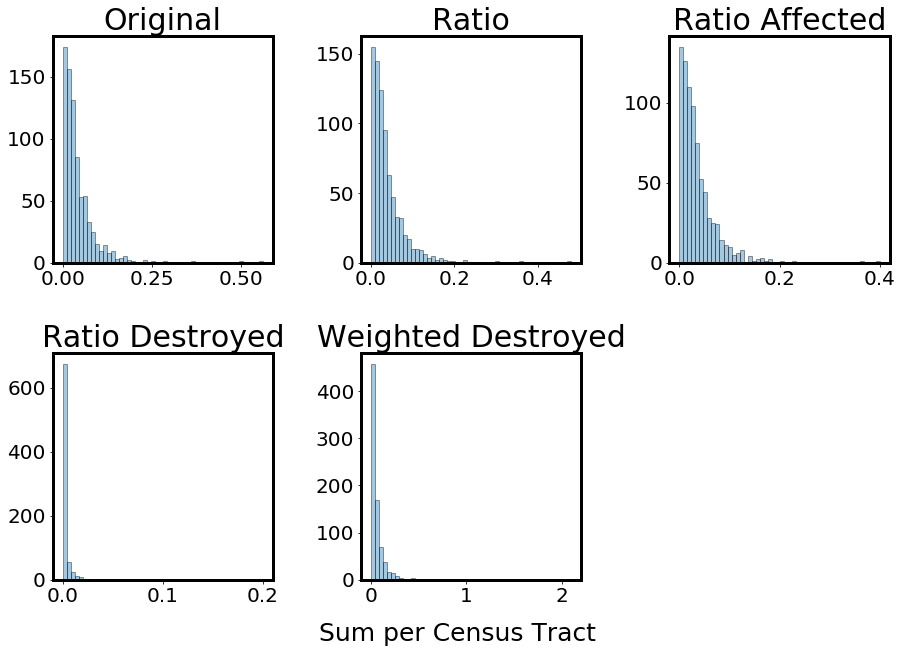

In [352]:
plt.rcParams["patch.force_edgecolor"] = True
fig, ax = plt.subplots(2,3,figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

sns.distplot(df_No0['O_Ind'].values,kde=False,ax=ax[0,0])
sns.distplot(df_No0['R_Ind'].values,kde=False,ax=ax[0,1])
sns.distplot(df_No0['RA_Ind'].values,kde=False,ax=ax[0,2])
sns.distplot(df_No0['RD_Ind'].values,kde=False,ax=ax[1,0])
sns.distplot(df_No0['WD_Ind'].values,kde=False,ax=ax[1,1])
fig.delaxes(ax[1,2])

ax[0,0].set_title('Original')
ax[0,1].set_title('Ratio')
ax[0,2].set_title('Ratio Affected')
ax[1,0].set_title('Ratio Destroyed')
ax[1,1].set_title('Weighted Destroyed')


fig.text(0.5, 0.04, 'Sum per Census Tract', ha='center')

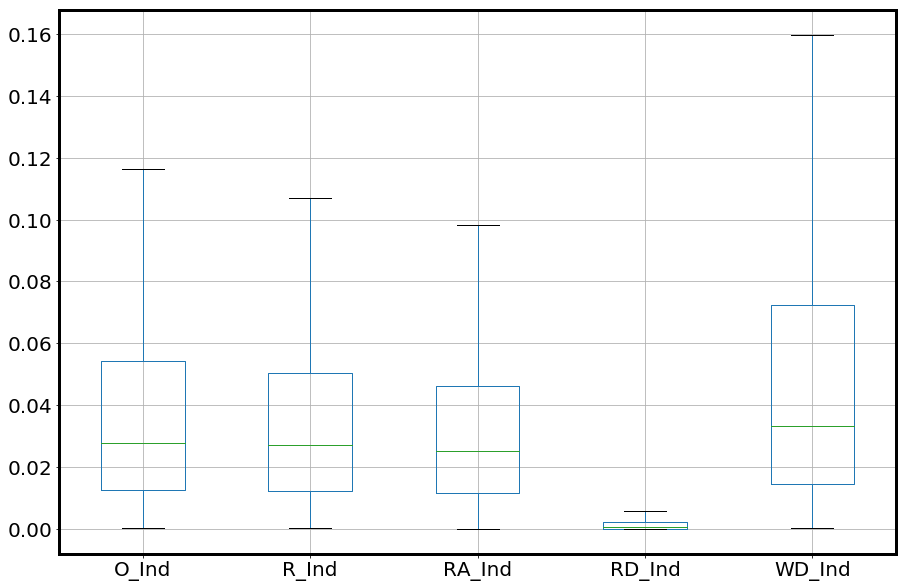

In [353]:
boxplot = df_No0.boxplot(column=['O_Ind', 'R_Ind', 'RA_Ind', 'RD_Ind','WD_Ind'], showfliers=False)

In [354]:
df_No0.to_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/DamageIndices2.xlsx")

# Drop outliers with Interquartile Range

Q1 = df_No0.quantile(0.25)
Q3 = df_No0.quantile(0.75)
IQR = Q3 - Q1
((df_No0 < (Q1 - 1.5 * IQR)) | (df_No0 > (Q3 + 1.5 * IQR))).sum()

In [299]:
Q1 = df_No0.R_Ind.quantile(0.25)
Q3 = df_No0.R_Ind.quantile(0.75)
IQR = Q3 - Q1
((df_No0.R_Ind < (Q1 - 1.5 * IQR)) | (df_No0.R_Ind > (Q3 + 1.5 * IQR))).sum()

43

In [300]:
mask = ((df_No0.R_Ind < (Q1 - 1.5 * IQR)) | (df_No0.R_Ind > (Q3 + 1.5 * IQR)))

In [301]:
df_No0.R_Ind[mask] = np.nan

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [302]:
df_No0_NoO = df_No0.dropna()

In [303]:
mask2 = ((df.R_Ind < (Q1 - 1.5 * IQR)) | (df.R_Ind > (Q3 + 1.5 * IQR)))

In [304]:
df.R_Ind[mask2] = np.nan

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [305]:
df_NoO = df.dropna()

In [306]:
df_No0_NoO

Count_  Sum_NA  Sum_AFF  Sum_DES     O_Ind     R_Ind    RA_Ind  \
FIPS                                                                          
72097081512    2687    2531      146       10  0.061779  0.058057  0.054336   
72023830603    4269    4268        1        0  0.000234  0.000234  0.000234   
72023830604    7069    7058       11        0  0.001556  0.001556  0.001556   
72023830101    2970    2924       45        1  0.015825  0.015488  0.015152   
72023830102    2562    2525       37        0  0.014442  0.014442  0.014442   
72023830200    3965    3824      138        3  0.036318  0.035561  0.034805   
72023830300    2608    2593       13        2  0.006518  0.005752  0.004985   
72023830400    2314    2309        5        0  0.002161  0.002161  0.002161   
72023830502    2983    2909       69        5  0.026483  0.024807  0.023131   
72023830503    2779    2746       33        0  0.011875  0.011875  0.011875   
72023830504    1693    1612       78        3  0.049616  0.047844  0.046072   
72067820300    2049    2029       20        0  0.009761  0.009761  0.009761   
72079850400    3995    3991        4        0  0.001001  0.001001  0.001001   
72055961000    1528    1484       41        3  0.030759  0.028796  0.026832   
72055961400     948     920       25        3  0.032700  0.029536  0.026371   
72055961500    1711    1677       32        2  0.021040  0.019871  0.018703   
72079850300    2847    2835       12        0  0.004215  0.004215  0.004215   
72125840100    2659    2605       54        0  0.020308  0.020308  0.020308   
72125840200    3482    3437       45        0  0.012924  0.012924  0.012924   
72125840500    1854    1846        8        0  0.004315  0.004315  0.004315   
72125840600    2607    2564       42        1  0.016878  0.016494  0.016110   
72121960300    3399    3338       59        2  0.018535  0.017946  0.017358   
72125840300    2837    2836        1        0  0.000352  0.000352  0.000352   
72067820100    3564    3525       39        0  0.010943  0.010943  0.010943   
72067820400     914     879       34        1  0.039387  0.038293  0.037199   
72067820500     939     931        8        0  0.008520  0.008520  0.008520   
72097080100     682     667       15        0  0.021994  0.021994  0.021994   
72097080200     522     513        9        0  0.017241  0.017241  0.017241   
72097080300     580     561       19        0  0.032759  0.032759  0.032759   
72097080400     824     822        2        0  0.002427  0.002427  0.002427   
...             ...     ...      ...      ...       ...       ...       ...   
72029100200     784     768       16        0  0.020408  0.020408  0.020408   
72029100400    2290    2123      161        6  0.075546  0.072926  0.070306   
72029100502    1026    1022        4        0  0.003899  0.003899  0.003899   
72029100503    1835    1832        3        0  0.001635  0.001635  0.001635   
72029100504    1665    1619       41        5  0.030631  0.027628  0.024625   
72031051103    1461    1416       44        1  0.031485  0.030801  0.030116   
72031051104    1123    1109       14        0  0.012467  0.012467  0.012467   
72087110101    1129    1094       35        0  0.031001  0.031001  0.031001   
72087110102     997     961       35        1  0.037111  0.036108  0.035105   
72087110200    1101    1083       18        0  0.016349  0.016349  0.016349   
72087110301    1422    1285      137        0  0.096343  0.096343  0.096343   
72087110302    1733    1717       16        0  0.009233  0.009233  0.009233   
72087110303     997     982       14        1  0.016048  0.015045  0.014042   
72087110304    1454    1450        4        0  0.002751  0.002751  0.002751   
72087110400     540     515       25        0  0.046296  0.046296  0.046296   
72087110500     541     516       23        2  0.049908  0.046211  0.042514   
72119130101    2143    2082       61        0  0.028465  0.028465  0.028465   
72119130102    2550    2507       41        2  0.017647  0.0168

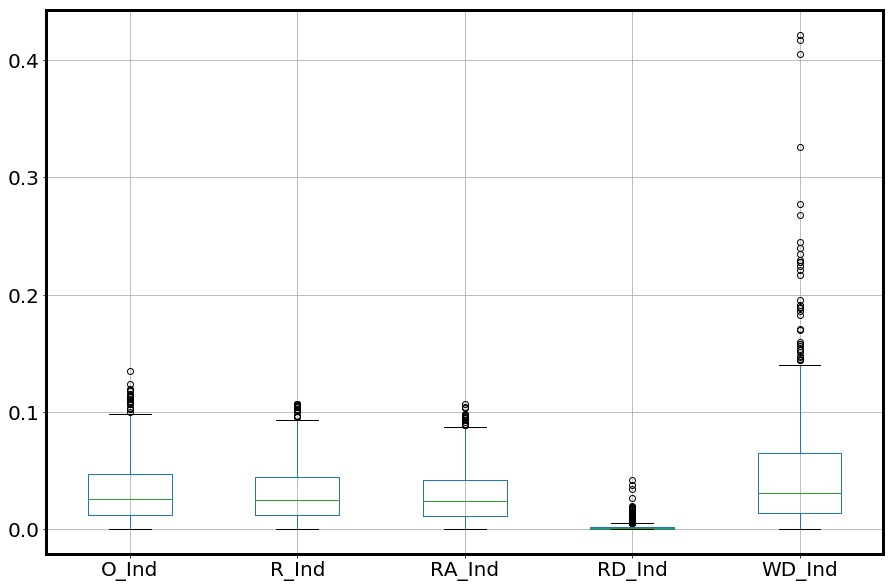

In [307]:
boxplot = df_No0_NoO.boxplot(column=['O_Ind', 'R_Ind', 'RA_Ind', 'RD_Ind','WD_Ind'])

Text(0.5,0.04,'Sum per Census Tract')

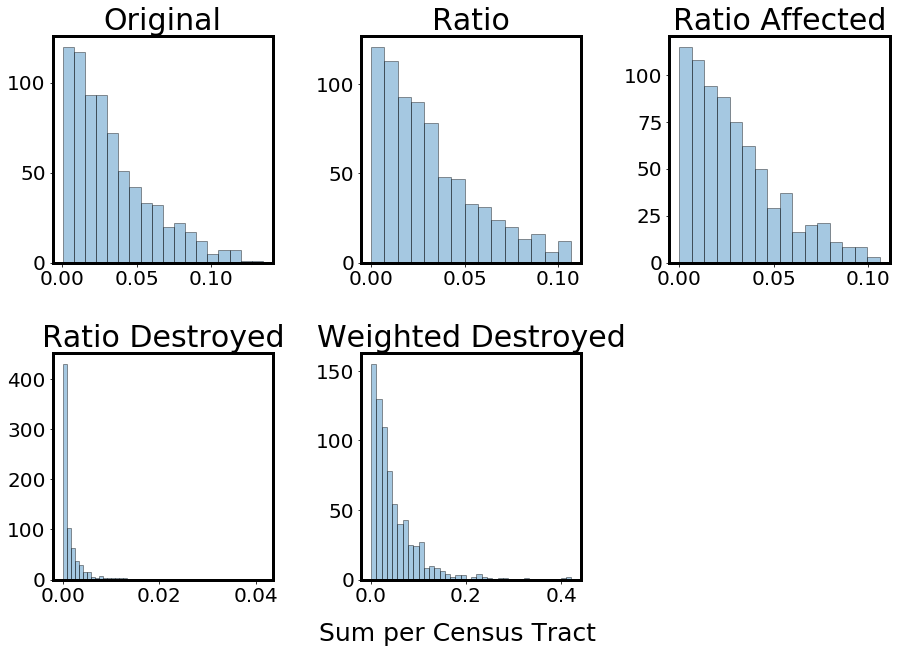

In [308]:
plt.rcParams["patch.force_edgecolor"] = True
fig, ax = plt.subplots(2,3,figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

sns.distplot(df_No0_NoO['O_Ind'].values,kde=False,ax=ax[0,0])
sns.distplot(df_No0_NoO['R_Ind'].values,kde=False,ax=ax[0,1])
sns.distplot(df_No0_NoO['RA_Ind'].values,kde=False,ax=ax[0,2])
sns.distplot(df_No0_NoO['RD_Ind'].values,kde=False,ax=ax[1,0])
sns.distplot(df_No0_NoO['WD_Ind'].values,kde=False,ax=ax[1,1])
fig.delaxes(ax[1,2])

ax[0,0].set_title('Original')
ax[0,1].set_title('Ratio')
ax[0,2].set_title('Ratio Affected')
ax[1,0].set_title('Ratio Destroyed')
ax[1,1].set_title('Weighted Destroyed')


fig.text(0.5, 0.04, 'Sum per Census Tract', ha='center')

# Make Classifier Index

In [309]:
data = pd.read_excel(r'/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/DamageIndices1.xlsx')
df_orig = pd.DataFrame(data)

In [310]:
df_orig = df_orig.set_index(['FIPS'])

In [311]:
df_orig

Count_  Sum_NA  Sum_AFF  Sum_DES     O_Ind     R_Ind    RA_Ind  \
FIPS                                                                          
72097081512    2687    2531      146       10  0.061779  0.058057  0.054336   
72023830603    4269    4268        1        0  0.000234  0.000234  0.000234   
72023830604    7069    7058       11        0  0.001556  0.001556  0.001556   
72023980000      24      24        0        0  0.000000  0.000000  0.000000   
72023990000       0       0        0        0  0.000000  0.000000  0.000000   
72023830101    2970    2924       45        1  0.015825  0.015488  0.015152   
72023830102    2562    2525       37        0  0.014442  0.014442  0.014442   
72023830200    3965    3824      138        3  0.036318  0.035561  0.034805   
72023830300    2608    2593       13        2  0.006518  0.005752  0.004985   
72023830400    2314    2309        5        0  0.002161  0.002161  0.002161   
72023830502    2983    2909       69        5  0.026483  0.024807  0.023131   
72023830503    2779    2746       33        0  0.011875  0.011875  0.011875   
72023830504    1693    1612       78        3  0.049616  0.047844  0.046072   
72067820300    2049    2029       20        0  0.009761  0.009761  0.009761   
72079850400    3995    3991        4        0  0.001001  0.001001  0.001001   
72055961000    1528    1484       41        3  0.030759  0.028796  0.026832   
72055961400     948     920       25        3  0.032700  0.029536  0.026371   
72055961500    1711    1677       32        2  0.021040  0.019871  0.018703   
72079850101    1725    1725        0        0  0.000000  0.000000  0.000000   
72079850102    3774    3774        0        0  0.000000  0.000000  0.000000   
72079850200    2247    2247        0        0  0.000000  0.000000  0.000000   
72079850300    2847    2835       12        0  0.004215  0.004215  0.004215   
72125840100    2659    2605       54        0  0.020308  0.020308  0.020308   
72125840200    3482    3437       45        0  0.012924  0.012924  0.012924   
72125840400    1892    1892        0        0  0.000000  0.000000  0.000000   
72125840500    1854    1846        8        0  0.004315  0.004315  0.004315   
72125840600    2607    2564       42        1  0.016878  0.016494  0.016110   
72125840700    2013    2013        0        0  0.000000  0.000000  0.000000   
72121960300    3399    3338       59        2  0.018535  0.017946  0.017358   
72121960400    1859    1859        0        0  0.000000  0.000000  0.000000   
...             ...     ...      ...      ...       ...       ...       ...   
72029100502    1026    1022        4        0  0.003899  0.003899  0.003899   
72029100503    1835    1832        3        0  0.001635  0.001635  0.001635   
72029100504    1665    1619       41        5  0.030631  0.027628  0.024625   
72031051103    1461    1416       44        1  0.031485  0.030801  0.030116   
72031051104    1123    1109       14        0  0.012467  0.012467  0.012467   
72087110101    1129    1094       35        0  0.031001  0.031001  0.031001   
72087110102     997     961       35        1  0.037111  0.036108  0.035105   
72087110200    1101    1083       18        0  0.016349  0.016349  0.016349   
72087110301    1422    1285      137        0  0.096343  0.096343  0.096343   
72087110302    1733    1717       16        0  0.009233  0.009233  0.009233   
72087110303     997     982       14        1  0.016048  0.015045  0.014042   
72087110304    1454    1450        4        0  0.002751  0.002751  0.002751   
72087110400     540     515       25        0  0.046296  0.046296  0.046296   
72087110500     541     516       23        2  0.049908  0.046211  0.042514   
72119130101    2143    2082       61        0  0.028465  0.028465  0.028465   
72119130102    2550    2507       41        2  0.017647  0.016863  0.016078   
72119130200    1187    1137       50        0  0.042123  0.042123  0.042123   
72119130300    1519    1512        7        0  0.004608  0.0046

In [312]:
df_c = df_orig.drop(['O_Ind', 'RA_Ind', 'RD_Ind', 'WD_Ind'], axis=1)

In [313]:
df_c.head()

Count_  Sum_NA  Sum_AFF  Sum_DES     R_Ind
FIPS                                                   
72097081512    2687    2531      146       10  0.058057
72023830603    4269    4268        1        0  0.000234
72023830604    7069    7058       11        0  0.001556
72023980000      24      24        0        0  0.000000
72023990000       0       0        0        0  0.000000

## 4 bins

In [314]:
pd.qcut(df_c['R_Ind'], q=4)

FIPS
72097081512       (0.0454, 0.48]
72023830603    (-0.001, 0.00673]
72023830604    (-0.001, 0.00673]
72023980000    (-0.001, 0.00673]
72023990000    (-0.001, 0.00673]
72023830101     (0.00673, 0.022]
72023830102     (0.00673, 0.022]
72023830200      (0.022, 0.0454]
72023830300    (-0.001, 0.00673]
72023830400    (-0.001, 0.00673]
72023830502      (0.022, 0.0454]
72023830503     (0.00673, 0.022]
72023830504       (0.0454, 0.48]
72067820300     (0.00673, 0.022]
72079850400    (-0.001, 0.00673]
72055961000      (0.022, 0.0454]
72055961400      (0.022, 0.0454]
72055961500     (0.00673, 0.022]
72079850101    (-0.001, 0.00673]
72079850102    (-0.001, 0.00673]
72079850200    (-0.001, 0.00673]
72079850300    (-0.001, 0.00673]
72125840100     (0.00673, 0.022]
72125840200     (0.00673, 0.022]
72125840400    (-0.001, 0.00673]
72125840500    (-0.001, 0.00673]
72125840600     (0.00673, 0.022]
72125840700    (-0.001, 0.00673]
72121960300     (0.00673, 0.022]
72121960400    (-0.001, 0.00673]
     

In [315]:
pd.qcut(df_c['R_Ind'], q=4).value_counts()

(-0.001, 0.00673]    227
(0.0454, 0.48]       226
(0.022, 0.0454]      226
(0.00673, 0.022]     226
Name: R_Ind, dtype: int64

In [316]:
bin_labels_4 = ['low_d', 'medl_d', 'medh_d', 'high_d']

In [317]:
df_c['quantile_4'] = pd.qcut(df_c['R_Ind'], q=4, labels = bin_labels_4)

## 3 bins

In [318]:
pd.qcut(df_c['R_Ind'], q=3)

FIPS
72097081512       (0.035, 0.48]
72023830603    (-0.001, 0.0116]
72023830604    (-0.001, 0.0116]
72023980000    (-0.001, 0.0116]
72023990000    (-0.001, 0.0116]
72023830101     (0.0116, 0.035]
72023830102     (0.0116, 0.035]
72023830200       (0.035, 0.48]
72023830300    (-0.001, 0.0116]
72023830400    (-0.001, 0.0116]
72023830502     (0.0116, 0.035]
72023830503     (0.0116, 0.035]
72023830504       (0.035, 0.48]
72067820300    (-0.001, 0.0116]
72079850400    (-0.001, 0.0116]
72055961000     (0.0116, 0.035]
72055961400     (0.0116, 0.035]
72055961500     (0.0116, 0.035]
72079850101    (-0.001, 0.0116]
72079850102    (-0.001, 0.0116]
72079850200    (-0.001, 0.0116]
72079850300    (-0.001, 0.0116]
72125840100     (0.0116, 0.035]
72125840200     (0.0116, 0.035]
72125840400    (-0.001, 0.0116]
72125840500    (-0.001, 0.0116]
72125840600     (0.0116, 0.035]
72125840700    (-0.001, 0.0116]
72121960300     (0.0116, 0.035]
72121960400    (-0.001, 0.0116]
                     ...       
720

In [319]:
pd.qcut(df_c['R_Ind'], q=3).value_counts()

(0.035, 0.48]       302
(-0.001, 0.0116]    302
(0.0116, 0.035]     301
Name: R_Ind, dtype: int64

In [320]:
bin_labels_3 = ['low_d', 'med_d', 'high_d']

In [321]:
df_c['quantile_3'] = pd.qcut(df_c['R_Ind'], q=3, labels = bin_labels_3)

In [322]:
df_c.head()

Count_  Sum_NA  Sum_AFF  Sum_DES     R_Ind quantile_4 quantile_3
FIPS                                                                         
72097081512    2687    2531      146       10  0.058057     high_d     high_d
72023830603    4269    4268        1        0  0.000234      low_d      low_d
72023830604    7069    7058       11        0  0.001556      low_d      low_d
72023980000      24      24        0        0  0.000000      low_d      low_d
72023990000       0       0        0        0  0.000000      low_d      low_d

## Encode Classes

In [323]:
df_c.quantile_3 = pd.Categorical(df_c.quantile_3)
df_c.quantile_4 = pd.Categorical(df_c.quantile_4)

In [324]:
df_c['q3_code'] = df_c.quantile_3.cat.codes
df_c['q4_code'] = df_c.quantile_4.cat.codes

In [325]:
df_c

Count_  Sum_NA  Sum_AFF  Sum_DES     R_Ind quantile_4 quantile_3  \
FIPS                                                                            
72097081512    2687    2531      146       10  0.058057     high_d     high_d   
72023830603    4269    4268        1        0  0.000234      low_d      low_d   
72023830604    7069    7058       11        0  0.001556      low_d      low_d   
72023980000      24      24        0        0  0.000000      low_d      low_d   
72023990000       0       0        0        0  0.000000      low_d      low_d   
72023830101    2970    2924       45        1  0.015488     medl_d      med_d   
72023830102    2562    2525       37        0  0.014442     medl_d      med_d   
72023830200    3965    3824      138        3  0.035561     medh_d     high_d   
72023830300    2608    2593       13        2  0.005752      low_d      low_d   
72023830400    2314    2309        5        0  0.002161      low_d      low_d   
72023830502    2983    2909       69        5  0.024807     medh_d      med_d   
72023830503    2779    2746       33        0  0.011875     medl_d      med_d   
72023830504    1693    1612       78        3  0.047844     high_d     high_d   
72067820300    2049    2029       20        0  0.009761     medl_d      low_d   
72079850400    3995    3991        4        0  0.001001      low_d      low_d   
72055961000    1528    1484       41        3  0.028796     medh_d      med_d   
72055961400     948     920       25        3  0.029536     medh_d      med_d   
72055961500    1711    1677       32        2  0.019871     medl_d      med_d   
72079850101    1725    1725        0        0  0.000000      low_d      low_d   
72079850102    3774    3774        0        0  0.000000      low_d      low_d   
72079850200    2247    2247        0        0  0.000000      low_d      low_d   
72079850300    2847    2835       12        0  0.004215      low_d      low_d   
72125840100    2659    2605       54        0  0.020308     medl_d      med_d   
72125840200    3482    3437       45        0  0.012924     medl_d      med_d   
72125840400    1892    1892        0        0  0.000000      low_d      low_d   
72125840500    1854    1846        8        0  0.004315      low_d      low_d   
72125840600    2607    2564       42        1  0.016494     medl_d      med_d   
72125840700    2013    2013        0        0  0.000000      low_d      low_d   
72121960300    3399    3338       59        2  0.017946     medl_d      med_d   
72121960400    1859    1859        0        0  0.000000      low_d      low_d   
...             ...     ...      ...      ...       ...        ...        ...   
72029100502    1026    1022        4        0  0.003899      low_d      low_d   
72029100503    1835    1832        3        0  0.001635      low_d      low_d   
72029100504    1665    1619       41        5  0.027628     medh_d      med_d   
72031051103    1461    1416       44        1  0.030801     medh_d      med_d   
72031051104    1123    1109       14        0  0.012467     medl_d      med_d   
72087110101    1129    1094       35        0  0.031001     medh_d      med_d   
72087110102     997     961       35        1  0.036108     medh_d     high_d   
72087110200    1101    1083       18        0  0.016349     medl_d      med_d   
72087110301    1422    1285      137        0  0.096343     high_d     high_d   
72087110302    1733    1717       16        0  0.009233     medl_d      low_d   
72087110303     997     982       14        1  0.015045     medl_d      med_d   
72087110304    1454    1450        4        0  0.002751      low_d      low_d   
72087110400     540     515       25        0  0.046296     high_d     high_d   
72087110500     541     516       23        2  0.046211     high_d     high_d   
72119130101    2143    2082       61        0  0.028465     medh_d      med_d   
72119130102    2550    2507       41        2  0.016863     medl_d      med_d   
72119130200    1187    1137       50        

# Merge and Export to Excel

In [327]:
df_list = [df_orig, df_No0, df_NoO, df_No0_NoO,df_c]

In [328]:
df = df_list[0]
for df_ in df_list[1:]:
    df = df.merge(df_, on='FIPS')

In [330]:
df.head()

Count__x  Sum_NA_x  Sum_AFF_x  Sum_DES_x   O_Ind_x   R_Ind_x  \
FIPS                                                                        
72097081512      2687      2531        146         10  0.061779  0.058057   
72023830603      4269      4268          1          0  0.000234  0.000234   
72023830604      7069      7058         11          0  0.001556  0.001556   
72023830101      2970      2924         45          1  0.015825  0.015488   
72023830102      2562      2525         37          0  0.014442  0.014442   

             RA_Ind_x  RD_Ind_x  WD_Ind_x  Count__y   ...     WD_Ind_y  \
FIPS                                                  ...                
72097081512  0.054336  0.003722  0.091552      2687   ...     0.091552   
72023830603  0.000234  0.000000  0.000234      4269   ...     0.000234   
72023830604  0.001556  0.000000  0.001556      7069   ...     0.001556   
72023830101  0.015152  0.000337  0.018519      2970   ...     0.018519   
72023830102  0.014442  0.000000  0.014442      2562   ...     0.014442   

             Count_  Sum_NA  Sum_AFF  Sum_DES     R_Ind  quantile_4  \
FIPS                                                                  
72097081512    2687    2531      146       10  0.058057      high_d   
72023830603    4269    4268        1        0  0.000234       low_d   
72023830604    7069    7058       11        0  0.001556       low_d   
72023830101    2970    2924       45        1  0.015488      medl_d   
72023830102    2562    2525       37        0  0.014442      medl_d   

             quantile_3  q3_code  q4_code  
FIPS                                       
72097081512      high_d        2        3  
72023830603       low_d        0        0  
72023830604       low_d        0        0  
72023830101       med_d        1        1  
72023830102       med_d        1        1  

[5 rows x 45 columns]

Count__x
Sum_NA_x
Sum_AFF_x
Sum_DES_x
O_Ind_x
R_Ind_x
RA_Ind_x
RD_Ind_x
WD_Ind_x
Count__y
Sum_NA_y
Sum_AFF_y
Sum_DES_y
O_Ind_y
R_Ind_y
RA_Ind_y
RD_Ind_y
WD_Ind_y
Count__x
Sum_NA_x
Sum_AFF_x
Sum_DES_x
O_Ind_x
R_Ind_x
RA_Ind_x
RD_Ind_x
WD_Ind_x
Count__y
Sum_NA_y
Sum_AFF_y
Sum_DES_y
O_Ind_y
R_Ind_y
RA_Ind_y
RD_Ind_y
WD_Ind_y
Count_
Sum_NA
Sum_AFF
Sum_DES
R_Ind
quantile_4
quantile_3
q3_code
q4_code
